In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fbprophet import Prophet

covid_df = pd.read_csv('covid19_global.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26696 entries, 0 to 26695
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       26696 non-null  object
 1   Country    26696 non-null  object
 2   Confirmed  26696 non-null  int64 
 3   Recovered  26696 non-null  int64 
 4   Deaths     26696 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ MB


In [2]:
covid_df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

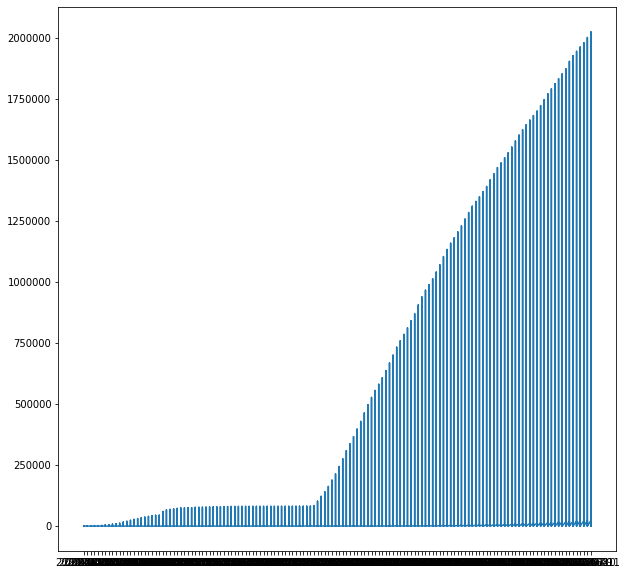

In [3]:
covid_df.sort_values('Date')
plt.figure(figsize = (10,10))
plt.plot(covid_df['Date'],covid_df['Confirmed'])

In [4]:
covid_df = covid_df[covid_df['Country']=='Bangladesh']
covid_df = covid_df[['Date','Confirmed']]

In [5]:
covid_df = covid_df.rename(columns = {'Date':'ds', 'Confirmed':'y'})
covid_df.head()

,ds,y
13,2020-01-22,0
201,2020-01-23,0
389,2020-01-24,0
577,2020-01-25,0
765,2020-01-26,0


In [6]:
m = Prophet()
m.fit(covid_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

Text(0.5, 1, 'Covid-19 Cases Forecasting - Bangladesh')

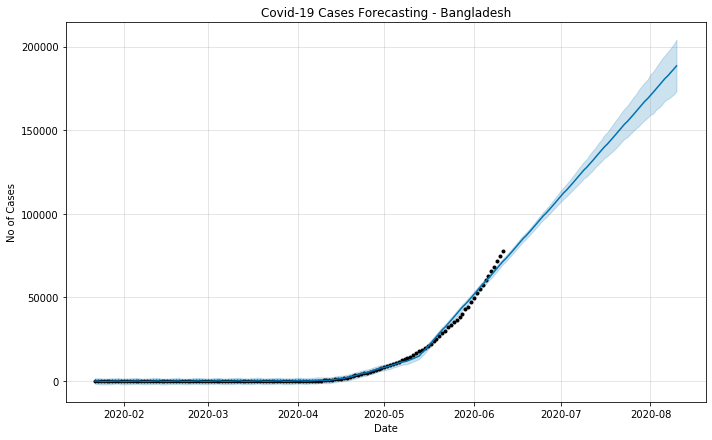

In [18]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'No of Cases')
plt.title('Covid-19 Cases Forecasting - Bangladesh')

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-83.408355,-1541.695830,1840.300488,-83.408355,-83.408355,140.745020,140.745020,140.745020,140.745020,140.745020,140.745020,0.0,0.0,0.0,57.336665
1,2020-01-23,-81.283759,-1827.043116,1720.582431,-81.283759,-81.283759,191.726719,191.726719,191.726719,191.726719,191.726719,191.726719,0.0,0.0,0.0,110.442960
2,2020-01-24,-79.159163,-1906.165123,1692.899264,-79.159163,-79.159163,-99.509795,-99.509795,-99.509795,-99.509795,-99.509795,-99.509795,0.0,0.0,0.0,-178.668958
3,2020-01-25,-77.034567,-1972.010334,1523.027750,-77.034567,-77.034567,-135.595547,-135.595547,-135.595547,-135.595547,-135.595547,-135.595547,0.0,0.0,0.0,-212.630114
4,2020-01-26,-74.909971,-1987.056094,1572.556026,-74.909971,-74.909971,-106.452010,-106.452010,-106.452010,-106.452010,-106.452010,-106.452010,0.0,0.0,0.0,-181.361981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,180664.128666,167651.940729,194748.248977,166794.213299,194613.329559,191.726719,191.726719,191.726719,191.726719,191.726719,191.726719,0.0,0.0,0.0,180855.855385
198,2020-08-07,182615.290593,168601.141380,196849.164278,168253.803471,196895.832029,-99.509795,-99.509795,-99.509795,-99.509795,-99.509795,-99.509795,0.0,0.0,0.0,182515.780799
199,2020-08-08,184566.452521,169835.401761,198934.347007,169889.960941,199309.807918,-135.595547,-135.595547,-135.595547,-135.595547,-135.595547,-135.595547,0.0,0.0,0.0,184430.856974
200,2020-08-09,186517.614448,171250.343851,201267.510114,171548.563901,201710.255240,-106.452010,-106.452010,-106.452010,-106.452010,-106.452010,-106.452010,0.0,0.0,0.0,186411.162438


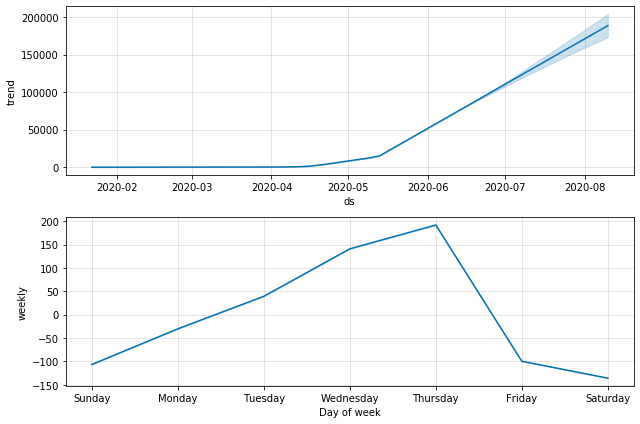

In [9]:
figure2 = m.plot_components(forecast)